# Movie Recommendation System (Content-based)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Cleaning

In [2]:
chunks = pd.read_csv("Top_10000_Movies.csv", chunksize=1000, lineterminator='\n')
df = pd.concat(chunks, ignore_index=True)
df.shape

(10000, 13)

In [3]:
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,revenue,runtime
count,10000.00000,10000.0000,10000.000000,10000.00000,10000.000000,1.000000e+04,9991.000000
mean,4999.50000,250053.0833,34.516871,6.29875,1315.084900,5.736388e+07,98.773596
std,2886.89568,261734.6183,100.693958,1.43426,2501.899103,1.480771e+08,28.800581
min,0.00000,5.0000,6.269000,0.00000,0.000000,0.000000e+00,0.000000
25%,2499.75000,11866.7500,11.908000,5.90000,118.000000,0.000000e+00,89.000000
50%,4999.50000,144476.0000,17.488000,6.50000,425.500000,5.912300e+05,99.000000
75%,7499.25000,451485.0000,29.626250,7.10000,1297.250000,4.764549e+07,113.000000
max,9999.00000,893478.0000,5401.308000,9.50000,30184.000000,2.847246e+09,400.000000


In [4]:
df.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [5]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_language  10000 non-null  object        
 1   original_title     10000 non-null  object        
 2   popularity         10000 non-null  float64       
 3   release_date       9962 non-null   datetime64[ns]
 4   vote_average       10000 non-null  float64       
 5   vote_count         10000 non-null  int64         
 6   genre              10000 non-null  object        
 7   overview           9900 non-null   object        
 8   revenue            10000 non-null  int64         
 9   runtime            9991 non-null   float64       
 10  tagline            7080 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 859.5+ KB


In [7]:
df.isnull().sum()

original_language       0
original_title          0
popularity              0
release_date           38
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 0
runtime                 9
tagline              2920
dtype: int64

In [8]:
df['overview'].fillna('No overview available', inplace=True)
df['tagline'].fillna('No tagline available', inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

In [9]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
avg_release_year = df['release_year'].mean()

# Fill missing values in 'release_date' with the average release year
df['release_date'].fillna(f"{int(avg_release_year)}-01-01", inplace=True)

# Dropping the temporary 'release_year' column
df.drop(columns=['release_year'], inplace=True)

In [10]:
df.isnull().sum()

original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
genre                0
overview             0
revenue              0
runtime              0
tagline              0
dtype: int64

In [11]:
df.head()

,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,No tagline available
1,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


## Data Visualization

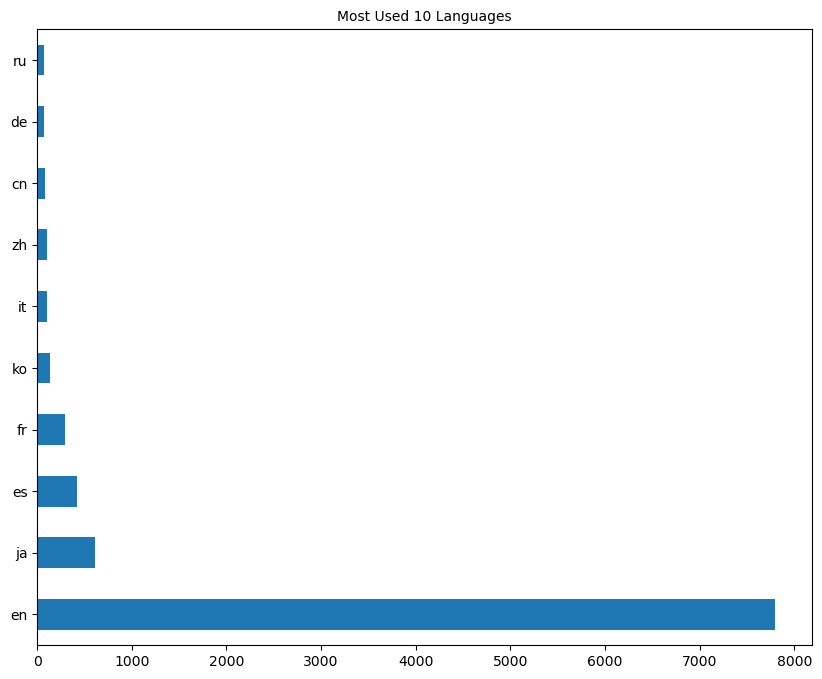

In [12]:
plt.figure(figsize=(10,8))
df["original_language"].value_counts().head(10).plot(kind='barh')
plt.title("Most Used 10 Languages", size=10)
plt.show()

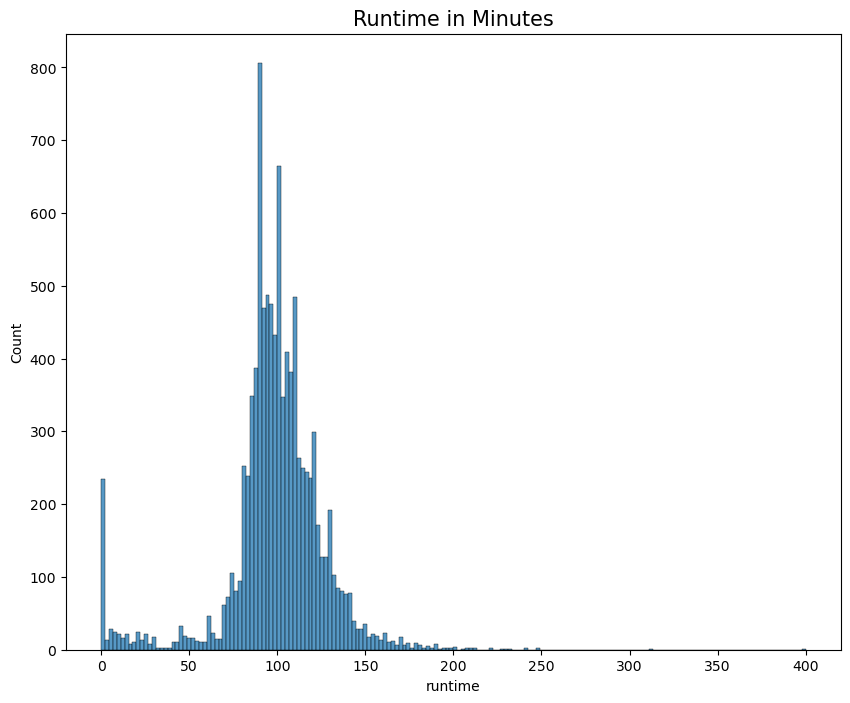

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(df["runtime"])
plt.title("Runtime in Minutes", size=15)
plt.show()

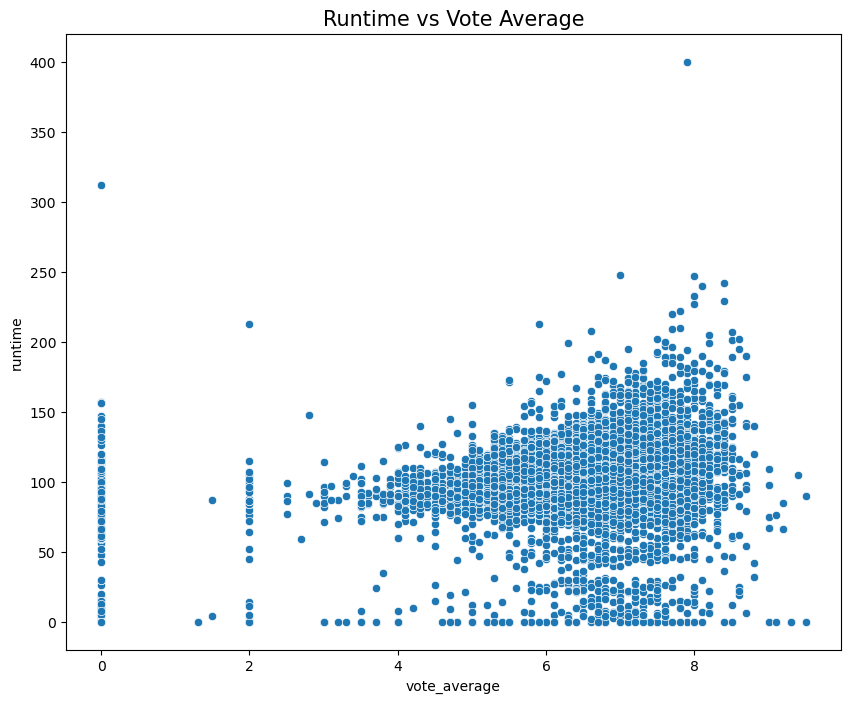

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df["vote_average"], y=df["runtime"])
plt.title("Runtime vs Vote Average", size=15)
plt.show()

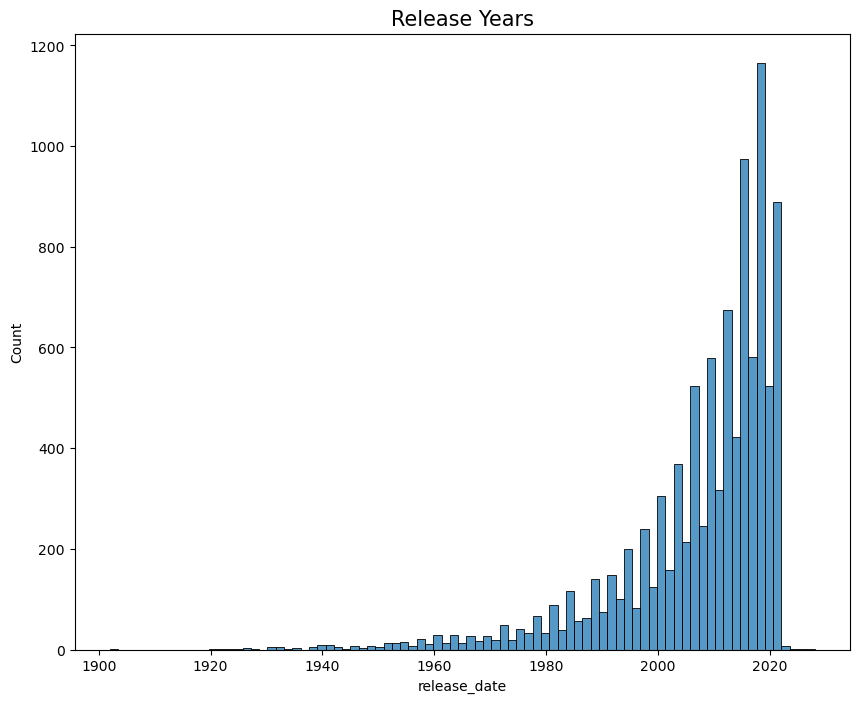

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(df["release_date"].dt.year)
plt.title("Release Years", size=15)
plt.show()

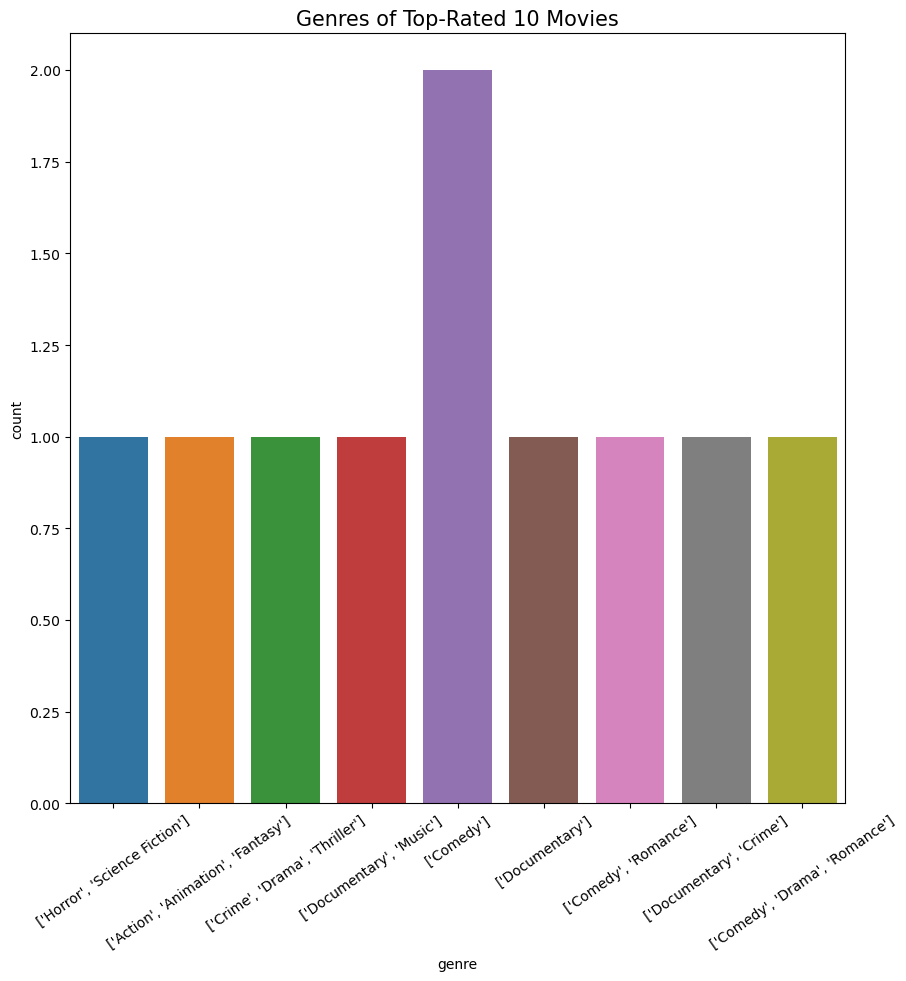

In [16]:
top_10_movies = df[df["genre"] != "[]"].sort_values(by="vote_average", ascending=False).head(10)

plt.figure(figsize=(10, 10))
sns.countplot(data=top_10_movies, x="genre")
plt.title("Genres of Top-Rated 10 Movies", size=15)
plt.xticks(rotation=35)
plt.show()

## Content Based Recommendation System
Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

### Data Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_language  10000 non-null  object        
 1   original_title     10000 non-null  object        
 2   popularity         10000 non-null  float64       
 3   release_date       10000 non-null  datetime64[ns]
 4   vote_average       10000 non-null  float64       
 5   vote_count         10000 non-null  int64         
 6   genre              10000 non-null  object        
 7   overview           10000 non-null  object        
 8   revenue            10000 non-null  int64         
 9   runtime            10000 non-null  float64       
 10  tagline            10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 859.5+ KB


In [18]:
df.head()['overview']

0    After finding a host body in investigative rep...
1    The Eternals are a team of ancient aliens who ...
2    Paul Atreides, a brilliant and gifted young ma...
3    A mysterious woman recruits bank teller Ludwig...
4    A bank teller called Guy realizes he is a back...
Name: overview, dtype: object

In [19]:
df['overview'][6]

'Investigative journalist Eddie Brock attempts a comeback following a scandal, but accidentally becomes the host of Venom, a violent, super powerful alien symbiote. Soon, he must rely on his newfound powers to protect the world from a shadowy organization looking for a symbiote of their own.'

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvec = TfidfVectorizer(
    min_df=3,
    max_features=None,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 3),
    stop_words='english'
)

In [21]:
# Fitting the TF-IDF on the 'overview' text
tfvec_matrix = tfvec.fit_transform(df['overview'])

In [22]:
tfvec_matrix

<10000x18075 sparse matrix of type '<class 'numpy.float64'>'
	with 262559 stored elements in Compressed Sparse Row format>

In [23]:
tfvec_matrix.shape

(10000, 18075)

In [24]:
from sklearn.metrics.pairwise import sigmoid_kernel, cosine_similarity

# Compute the sigmoid kernel
# sig = sigmoid_kernel(tfvec_matrix, tfvec_matrix)

# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfvec_matrix, tfvec_matrix)

In [25]:
cosine_sim[0]

array([1.       , 0.0340771, 0.       , ..., 0.       , 0.       ,
       0.       ])

In [26]:
indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()

In [27]:
indices

original_title
Venom: Let There Be Carnage       0
Eternals                          1
Dune                              2
Army of Thieves                   3
Free Guy                          4
                               ... 
A Grand Day Out                9995
El cantante                    9996
How I Live Now                 9997
Once                           9998
Manhattan Night                9999
Length: 10000, dtype: int64

In [28]:
indices['El cantante']

9996

In [29]:
cosine_sim[9996]

array([0.        , 0.        , 0.        , ..., 0.        , 0.04375135,
       0.        ])

In [30]:
list(enumerate(cosine_sim[indices['El cantante']]))

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.020400666001637206),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.05233963761850549),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.05818601012901286),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.038220333848354306),
 (44, 0.03986962738887915),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.10281237279772805),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.026115516948855846),
 (68, 0.0),
 (69, 0.018883263935389482),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (

In [31]:
def get_recommendation(title, sim=cosine_sim):
    # Get the index corresponding to original_title
    idx = indices[title]
    
    # Get the pairwise similarity scores
    sim_scores = list(enumerate(sim[idx]))
    
    # Sort the movies
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Scores of the 10 most similar movies
    sim_scores = sim_scores[0:10]
    
    # Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Top 10 most similar movies
    return df['original_title'].iloc[movie_indices]

In [32]:
# Testing our content-based recommendation system with the seminal film Spy Kids
get_recommendation('Avatar')

66                     Avatar
681         STAND BY ME ドラえもん
893                The Matrix
7094    Hellraiser: Bloodline
2695        映画ドラえもん のび太と銀河超特急
1674             The American
6860                Apollo 18
9995          A Grand Day Out
962             Europa Report
5638              Bitter Moon
Name: original_title, dtype: object

In [33]:
get_recommendation('Life')

2699                           Life
8761                 The Black Hole
5405                       Incoming
1456    Aliens vs Predator: Requiem
8752                        Солярис
2083                        Species
3632                Die Another Day
7422                        Spiders
7660                        Салют-7
5645                    The Special
Name: original_title, dtype: object